# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [1]:
#Import your libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime 

# Challenge 1 -  Explore the Internal Dataset

In this lab, we will start off by working with the wine dataset in scikit-learn. We will select the wine dataset and use a clustering algorithm to learn more about the functionalities of this library. 

We start off by loading the dataset using the `load_wine` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)). In the cell below, we will import the function from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

In the cell below, use the `load_wine` function and assign the wine dataset to a variable called `wine`.

In [3]:
wine = load_wine()

In the next step, list the keys of the variable `wine` to examine its contents. Note that the `load_wine` function does not return dataframes. It returns you a Python dictionary.

In [4]:
wine.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Next, list the feature names. These are the different characteristics of the wine. 

In [5]:
wine.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print the description of the dataset in the cell below using the `DESCR` attribute of the `wine` variable.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the print function.*

In [6]:
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### From the description, we see that all columns are numeric. We also know that there is no missing data 

Let's plot the alcohol content histogram. Recall that we are working with a numpy array and will need to use a matplotlib function to produce a histogram. 

In [7]:
# imports


In [8]:
# Your code here:
wine_features = pd.DataFrame(columns=wine.feature_names, data=wine.data)
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <a list of 10 Patch objects>)

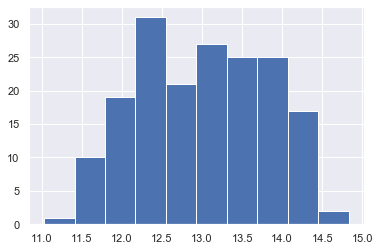

In [9]:
plt.hist(wine_features.alcohol)

# Challenge 2 - Clustering the Internal Dataset

In this portion of the lab, we will cluster the data to find common traits between the different wines. We will use the k-means clustering algorithm to achieve this goal.

#### We start by importing k-means from scikit-learn and then proceed to create 4 clusters.

In [10]:
# imports
from sklearn.cluster import KMeans

In [11]:
# Your code here:
kmeans = KMeans(n_clusters=4)

#### Print the cluster labels.

In [12]:
wine_model = kmeans.fit(wine_features)
clusters = wine_model.cluster_centers_
clusters

array([[1.29328070e+01, 2.66192982e+00, 2.40315789e+00, 1.99807018e+01,
        1.01842105e+02, 2.04912281e+00, 1.46315789e+00, 4.01929825e-01,
        1.43350877e+00, 5.75333333e+00, 8.65087719e-01, 2.29631579e+00,
        6.97087719e+02],
       [1.38600000e+01, 1.79391304e+00, 2.50695652e+00, 1.70739130e+01,
        1.06000000e+02, 2.94304348e+00, 3.11086957e+00, 2.98695652e-01,
        1.92608696e+00, 6.26000000e+00, 1.10000000e+00, 3.03565217e+00,
        1.33856522e+03],
       [1.25042424e+01, 2.44318182e+00, 2.28378788e+00, 2.07772727e+01,
        9.24696970e+01, 2.07333333e+00, 1.79545455e+00, 3.84696970e-01,
        1.47181818e+00, 4.07242423e+00, 9.46212121e-01, 2.50484848e+00,
        4.52545455e+02],
       [1.35275000e+01, 1.92593750e+00, 2.37093750e+00, 1.77250000e+01,
        1.06500000e+02, 2.72500000e+00, 2.74250000e+00, 2.88750000e-01,
        1.87593750e+00, 4.98875000e+00, 1.04268750e+00, 3.08906250e+00,
        1.01743750e+03]])

In [13]:
wine_features['cluster_n'] = wine_model.fit_predict(wine_features)
wine_features.cluster_n.value_counts()

0    66
3    57
1    32
2    23
Name: cluster_n, dtype: int64

#### Compute the size of each cluster. This can be done by counting the number of occurrences of each unique label in the list above.

Which is the largest cluster of the 4?

In [14]:
# Your code here:
#done it above, the cluster 0 is thelargest with 59 ocurrences.

#### Inspect the shape of `wine['data']`

In [15]:
wine_features.shape


(178, 14)

#### Inspect the first 5 records in `wine['data']`

In [16]:
wine_features.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster_n
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,3


my wine_features have one more columns that is tha column we added with the cluster numberi it. and its a pandas df, but yes the original is like that.

You now know the data object is a 2-dimensional array in which there are 178 rows and 13 columns. Each row is a data record and each column is a feature.

#### What is the average ash content for each cluster? 

*Hints:* 

* *Ash* is the 3rd column.

* The data object is not a Pandas dataframe so you can't apply `pandas.DataFrame.groupby`. Instead, you can use `np.average`.

In [17]:
ash_clusters_grouped = wine_features.groupby('cluster_n').agg({'ash':'mean'})
ash_clusters_grouped.sort_values('ash', ascending=False)

,ash
cluster_n,
2,2.506957
3,2.403158
1,2.370937
0,2.283788


We can see how the cluster with higher ash content average is cluster 1,followed by 3,0 and 2.

# Challenge 3 - Load and Explore an External Dataset

We will now load an external dataset using Pandas and use scikit learn to explore the data. In this portion of the lab, we will use a [patient dataset from Kaggle](https://www.kaggle.com/miles99/patient-admission-dataset-for-learning-data-mining). 

In [18]:
data = pd.read_csv('..//data//patient_admission_dataset_for_learning_data_mining.csv')

In the next cell, print the first five rows of the data using the `head()` function.

In [19]:
data.head()


,id,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,False,True,59,176,8.200152e+09,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,False,True,77,186,NaN,Farris Robinet,12/7/2017,True,True,NaN,NaN
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,True,True,90,177,6.145594e+09,Kaspar Spitaro,10/5/2018,False,False,NaN,NaN
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,True,True,70,150,NaN,Rafferty Fowls,10/21/2018,False,True,NaN,NaN
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,False,True,82,140,4.804758e+08,Glenna MacNeachtain,11/15/2018,False,False,NaN,NaN


Next, print the column types and check which columns have been misclassified by pandas.

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   patient_name          1000 non-null   object 
 2   patient_email         1000 non-null   object 
 3   doctor_phone          1000 non-null   object 
 4   patient_gender        1000 non-null   object 
 5   patient_dob           1000 non-null   object 
 6   patient_diabetic      1000 non-null   bool   
 7   patient_allergic      1000 non-null   bool   
 8   patient_weight_kg     1000 non-null   int64  
 9   patient_height_sm     1000 non-null   int64  
 10  patient_nhs_number    796 non-null    float64
 11  doctor_name           942 non-null    object 
 12  appointment_date      1000 non-null   object 
 13  patient_show          1000 non-null   bool   
 14  is_regular_visit      1000 non-null   bool   
 15  prescribed_medicines  

#### We can see that none of the date columns have been correctly classified. Also, some columns contain qualitative data that can be dropped.

First, transform the `patient_dob` and `appointment_date` columns to datetime using the `pd.to_datetime` function.

In [21]:
data['patient_dob'] = data['patient_dob'].apply(pd.to_datetime)
data['appointment_date'] = data['appointment_date'].apply(pd.to_datetime)

Next, drop the `id`, `patient_name`, `patient_email`, `patient_nhs_number`, and `doctor_phone` columns. These are not quantitative columns and will not contribute to our analysis.

In [22]:
data.drop(['id','patient_name','patient_email', 'patient_nhs_number', 'doctor_phone'],axis=1, inplace=True)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   patient_gender        1000 non-null   object        
 1   patient_dob           1000 non-null   datetime64[ns]
 2   patient_diabetic      1000 non-null   bool          
 3   patient_allergic      1000 non-null   bool          
 4   patient_weight_kg     1000 non-null   int64         
 5   patient_height_sm     1000 non-null   int64         
 6   doctor_name           942 non-null    object        
 7   appointment_date      1000 non-null   datetime64[ns]
 8   patient_show          1000 non-null   bool          
 9   is_regular_visit      1000 non-null   bool          
 10  prescribed_medicines  512 non-null    object        
 11  diagnosis             512 non-null    object        
dtypes: bool(4), datetime64[ns](2), int64(2), object(4)
memory usage: 66.5+ KB


Now we work on the missing data. Most ML algorithms will not perform as intended if there are missing data.

In the cell below, count how many rows contain missing data in each column. You should see three columns contain missing data:

* `doctor_name`: 58 missing data
* `prescribed_medicines`: 488 missing data
* `diagnosis`: 488 missing data

In [24]:
data.isna().sum()


patient_gender            0
patient_dob               0
patient_diabetic          0
patient_allergic          0
patient_weight_kg         0
patient_height_sm         0
doctor_name              58
appointment_date          0
patient_show              0
is_regular_visit          0
prescribed_medicines    488
diagnosis               488
dtype: int64

The main issues are found in the `prescribed_medicines` and `diagnosis` columns. Can we simply drop these rows?

The answer is not yet. Because when there are missing data in these columns, it doesn't mean the data records are broken. Instead, it means no medication was prescribed and no diagnosis was recorded. Therefore, once we fill in the missing data these columns will be fine. But we'll revisit these columns and decide whether we will eventually drop them when we look at how many unique values are there in these categorical columns.  

For the `prescribed_medicines` column, fill the missing values with the value `no prescription`. For the `diagnosis` column, fill the missing values with `no diagnosis`.

*Hint: Use [`pandas.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).*

In [25]:
data.prescribed_medicines.fillna('no prescription', inplace=True)
data.diagnosis.fillna('no diagnosis', inplace=True)


In [26]:
data.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,False,True,59,176,Sarena Waliszek,2018-05-01,True,True,triamcinolone acetonide,I669
1,Female,2018-02-08,False,True,77,186,Farris Robinet,2017-12-07,True,True,no prescription,no diagnosis
2,Female,2018-10-09,True,True,90,177,Kaspar Spitaro,2018-10-05,False,False,no prescription,no diagnosis
3,Male,2018-09-10,True,True,70,150,Rafferty Fowls,2018-10-21,False,True,no prescription,no diagnosis
4,Female,2018-02-26,False,True,82,140,Glenna MacNeachtain,2018-11-15,False,False,no prescription,no diagnosis


In [27]:
data.isna().sum()


patient_gender           0
patient_dob              0
patient_diabetic         0
patient_allergic         0
patient_weight_kg        0
patient_height_sm        0
doctor_name             58
appointment_date         0
patient_show             0
is_regular_visit         0
prescribed_medicines     0
diagnosis                0
dtype: int64

How about `doctor_name`? Since a doctor visit without a doctor name might not be meaningful, we will drop these rows.

In [28]:
data.dropna(inplace=True)
data.isna().sum()


patient_gender          0
patient_dob             0
patient_diabetic        0
patient_allergic        0
patient_weight_kg       0
patient_height_sm       0
doctor_name             0
appointment_date        0
patient_show            0
is_regular_visit        0
prescribed_medicines    0
diagnosis               0
dtype: int64

#### Another step in preprocessing that can be performed by scikit-learn is label encoding. 

We have 4 columns that are of `bool` type. We would like to convert them to an integer column containing either zero or one. We can do this using [scikit-learn's label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In the cell below, import the label encoder and encode the 4 boolean columns (*patient_diabetic*, *patient_allergic*, *patient_show*, *is_regular_visit*) with `0` and `1`. 

In [29]:
label_encoder = preprocessing.LabelEncoder()

In [30]:
data['patient_diabetic'] = label_encoder.fit_transform(data['patient_diabetic'])
data['patient_allergic'] = label_encoder.fit_transform(data['patient_allergic'])
data['patient_show'] = label_encoder.fit_transform(data['patient_show'])
data['is_regular_visit'] = label_encoder.fit_transform(data['is_regular_visit'])

Print the data dtypes to confirm those four `bool` columns are converted to `int64`.

In [31]:
data.dtypes


patient_gender                  object
patient_dob             datetime64[ns]
patient_diabetic                 int64
patient_allergic                 int64
patient_weight_kg                int64
patient_height_sm                int64
doctor_name                     object
appointment_date        datetime64[ns]
patient_show                     int64
is_regular_visit                 int64
prescribed_medicines            object
diagnosis                       object
dtype: object

In [32]:
data.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,2018-10-18,0,1,59,176,Sarena Waliszek,2018-05-01,1,1,triamcinolone acetonide,I669
1,Female,2018-02-08,0,1,77,186,Farris Robinet,2017-12-07,1,1,no prescription,no diagnosis
2,Female,2018-10-09,1,1,90,177,Kaspar Spitaro,2018-10-05,0,0,no prescription,no diagnosis
3,Male,2018-09-10,1,1,70,150,Rafferty Fowls,2018-10-21,0,1,no prescription,no diagnosis
4,Female,2018-02-26,0,1,82,140,Glenna MacNeachtain,2018-11-15,0,0,no prescription,no diagnosis


#### The last step is to handle the `object` data.

There are 4 `object` columns now: `patient_gender`, `doctor_name`, `prescribed_medicines`, and `diagnosis`. The gender columns

In the next cell, check the unique values of each of the `object` columns using `value_counts()`.

In [33]:
print(data.patient_gender.value_counts())
print(data.doctor_name.value_counts())
print(data.prescribed_medicines.value_counts())
print(data.diagnosis.value_counts())

Female    476
Male      466
Name: patient_gender, dtype: int64
Sarena Waliszek           74
Cissy Markey              57
Flossy Canlin             55
Farris Robinet            55
Jilly McGrill             53
Gabie Brafield            53
Glenna MacNeachtain       53
Nerte Elmer               51
Oralie Swaffer            49
Kaspar Spitaro            48
Carly SperaJillie Katt    47
Humfried Cartmel          47
Wyn Grassett              47
Madelina Scurrell         46
Rafferty Fowls            45
Dulce McKerley            42
Rouvin McKinstry          42
Ryley Swallow             40
Hermina Domeny            38
Name: doctor_name, dtype: int64
no prescription                                                                                                      457
ALCOHOL                                                                                                                8
Ibuprofen                                                                                                       

#### The number of unique values is large for all three columns except `patient_gender`. We will handle these columns differently.

For `diagnosis`, there are too many unique values which will make ML difficult. However, we can re-encode the values to either with or without diagnosis. Remember at an earlier step we filled in the missing values of this column with *no diagnosis*? We can re-encode *no diagnosis* to `0` and all other values to `1`. In this way we can tremendously simply this column.

For `prescribed_medicines`, we can drop this column because it is perfectly correlated with `diagnosis`. Whenever there is no diagnosis, there is no prescribed medicine. So we don't need to keep this duplicated data.

How about `doctor_name`? There are not excessive unique values but still quite many (19). We may either drop or keep it but keeping it will make the analysis more complicated. So due to the length of this lab let's drop it.

How about `gender`? This one is easy. Just like re-encoding the boolean values, we can re-encode gender to `0` and `1` because there are only 2 unique values.

In the next cells, do the following:

1. Create a new column called `diagnosis_int` that has `0` and `1` based on the values in `diagnosis`.

1. Create a new column called `patient_gender_int` that has `0` and `1` based on the values in `patient_gender`.

1. Drop the following columns: `doctor_name`, `diagnosis`, `prescribed_medicines`, and `patient_gender`.

In [34]:
diagnosis = list(data.diagnosis.unique())

In [35]:
diagnosis.remove('no diagnosis')
data.replace({"diagnosis": {'no diagnosis': 0}}, inplace=True)

for i in diagnosis:
    data.replace({"diagnosis": {i: 1}}, inplace=True)

In [36]:
data.drop(['prescribed_medicines', 'doctor_name'], axis=1, inplace = True)

In [37]:
data.replace({"patient_gender": {'Female': 1, 'Male':0}}, inplace=True)

Let's look at the head again to ensure the re-encoding and dropping are successful:

In [38]:
#data.info()
data.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,appointment_date,patient_show,is_regular_visit,diagnosis
0,1,2018-10-18,0,1,59,176,2018-05-01,1,1,1
1,1,2018-02-08,0,1,77,186,2017-12-07,1,1,0
2,1,2018-10-09,1,1,90,177,2018-10-05,0,0,0
3,0,2018-09-10,1,1,70,150,2018-10-21,0,1,0
4,1,2018-02-26,0,1,82,140,2018-11-15,0,0,0


An interesting observation is that all patients are no older than 2 years. However, their weights and heights indicate that they are adults. This cannot be true. Therefore, we can either trust the weight and height columns or the DOB column. Since there are other columns that indicate that these are adults (they have emails, some have diabetes) we will drop the `patient_dob` column. We will also drop the `appointment_date` column since it has too many unique values to transform to a dummy variable. Drop the two columns in the cell below.

In [46]:
data.drop(['appointment_date','patient_dob'], axis=1,inplace=True)

In [49]:
#data.info()

#### Our data is now ready for clustering. Let's use k-means again.

We start by initializing and fitting a model in the cell below. Call this model patients_cluster.

In [52]:
# Your code here:
kmeans = KMeans(n_clusters=4)
patients_cluster = kmeans.fit(data)

Attach the labels to the dataframe. Do this by accessing the `labels_` in the `patients_cluster` model and assign them to a new column in `patients` that you will call `labels`.

In [53]:
# Your code here:
data['labels'] = patients_cluster.fit_predict(data)

In [56]:
data.labels.unique()

array([0, 1, 2, 3])

Now using a `groupby`, find the mean of every variable in `patients` and group by the `labels` column. This summary will allow us to see how the patients differ between the clusters. Your output should look similar to the image below.

![groupby mean](../images/groupby-mean.png)

Additionally, add a comment to describe which columns have the largest difference between clusters.

In [57]:
list(data.columns)

['patient_gender',
 'patient_diabetic',
 'patient_allergic',
 'patient_weight_kg',
 'patient_height_sm',
 'patient_show',
 'is_regular_visit',
 'diagnosis',
 'labels']

In [62]:
# Your code here:
data_grouped = data.groupby('labels').agg({'patient_gender':'mean',
                                           'patient_diabetic':'mean',
                                           'patient_allergic':'mean',
                                           'patient_weight_kg':'mean',
                                           'patient_height_sm':'mean',
                                           'patient_show':'mean',
                                           'is_regular_visit':'mean',
                                          'diagnosis':'mean'})
data_grouped.head()

,patient_gender,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis
labels,,,,,,,,
0,0.545833,0.508333,0.533333,62.900000,176.954167,0.475000,0.495833,0.454167
1,0.542169,0.485944,0.485944,94.112450,178.847390,0.506024,0.530120,0.510040
2,0.447826,0.504348,0.491304,65.365217,152.304348,0.508696,0.556522,0.504348
3,0.479821,0.560538,0.529148,97.381166,153.529148,0.488789,0.506726,0.596413


The columns with larger difference are weight and height.


# Bonus Challenge: Visualize K-Means Clusters

How did k-means cluster the data? You can obtain an intuitive view with a scatter plot. Generate a 2-d cluster plot below using `matplotlib`. You need to choose 2 of the features from your cleaned and transformed dataset, and use color to represent the cluster label generated from k-means.

If the scatter plot does not make any sense to you, it means the features you chose to visualize are not the right ones. You should be able to see 4 clear clusters with different colors in your visualization that suggests how k-means had clustered your data.

![Cluster Visualization](../images/clusters.png)

In [44]:
# Your code here:


Additionally, you can visualize the clusters in 3-D scatter plot. Give it a try below.

In [45]:
# Your code here:
